In [107]:
# imports 
from pandas import read_csv
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from scipy import stats
import scipy.cluster.hierarchy as hac
import random
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from time import time
import matplotlib.cm as cm

In [108]:
# Loading the dataset and random sub-sampling
n = 542153 #number of records in file
s = 5000 #desired sample size
skip = sorted(random.sample(range(1,n), n-s))

dataset_path  = '../Dataset/training_dataset.csv'
df = read_csv(dataset_path, skiprows=skip)
print("Before dropping rows with null values, shape: ", df.values.shape)
df = df.dropna(axis=0, how='any')
print("After dropping rows with null values, shape: ", df.values.shape)

df.drop('SHIP_ID', axis=1, inplace=True)
df.drop('SHIPTYPE', axis=1, inplace=True)
df.drop('ARRIVAL_PORT_CALC', axis=1, inplace=True)
df.drop('ARRIVAL_CALC', axis=1, inplace=True)
df.drop('REPORTED_DRAUGHT', axis=1, inplace=True)
df.drop('DEPARTURE_PORT_NAME', axis=1, inplace=True)
df.drop('TIMESTAMP', axis=1, inplace=True)

print(df.columns)
scaled_features = StandardScaler().fit_transform(df.values)
print("Scaled Features Shape: ", scaled_features.shape)

('Before dropping rows with null values, shape: ', (5000, 12))
('After dropping rows with null values, shape: ', (2736, 12))
Index([u'SPEED', u'LON', u'LAT', u'COURSE', u'HEADING'], dtype='object')
('Scaled Features Shape: ', (2736, 5))


In [109]:
# Visualize the clustering
def plot_clustering(X_red, X, labels, ax2, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    for i in range(X_red.shape[0]):
        ax2.text(X_red[i, 0], X_red[i, 1], '.',
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 12})

    ax2.set_xticks([])
    ax2.set_yticks([])
    if title is not None:
        ax2.set_title(title, size=17)
    ax2.axis('off')

#----------------------------------------------------------------------

In [110]:
# Initialize Common Stuff
# 2D embedding of the digits dataset
print("Computing embedding")
scaled_features_red = manifold.SpectralEmbedding(n_components=2).fit_transform(scaled_features)
print("Done.")
cluster_size_list = (5, 15, 25)

Computing embedding
Done.


Computing embedding
Done.
ward : 0.42s
('silhouette: ', 0.39496681762832309)
ward : 0.28s
('silhouette: ', -0.0061779306979266209)
ward : 0.26s
('silhouette: ', -0.053088034829071644)
average : 0.22s
('silhouette: ', -0.41466655036432498)
average : 0.31s
('silhouette: ', -0.18252804446204088)
average : 0.26s
('silhouette: ', -0.08255862080375248)
complete : 0.24s
('silhouette: ', -0.21362232692700051)
complete : 0.26s
('silhouette: ', -0.10437654709549558)
complete : 0.25s
('silhouette: ', -0.12590407745013635)


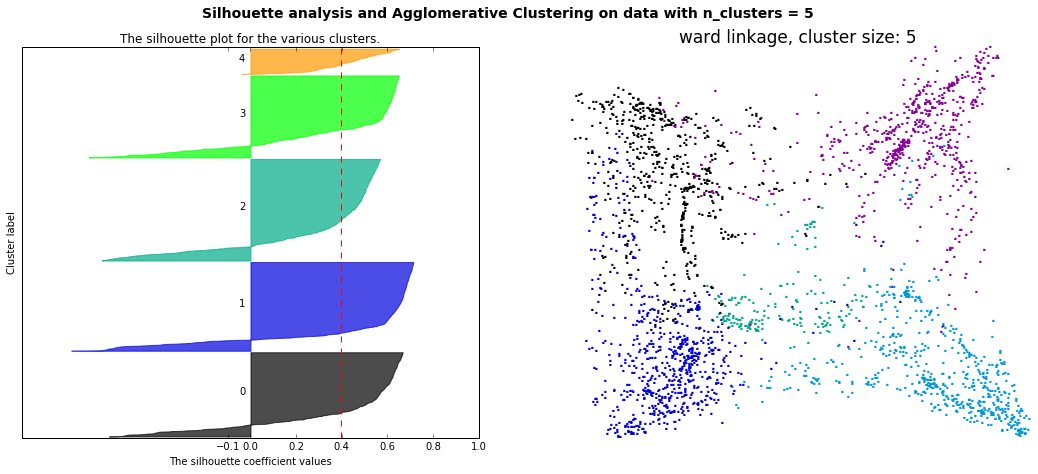

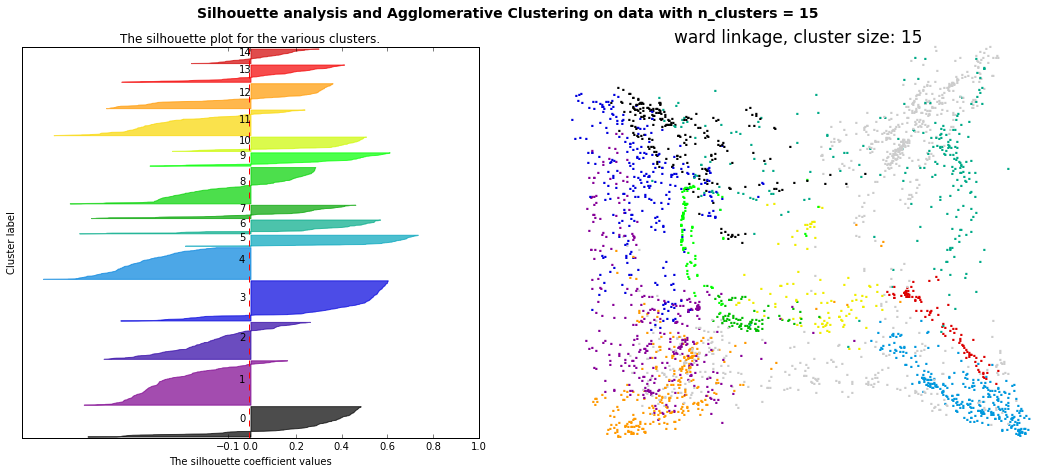

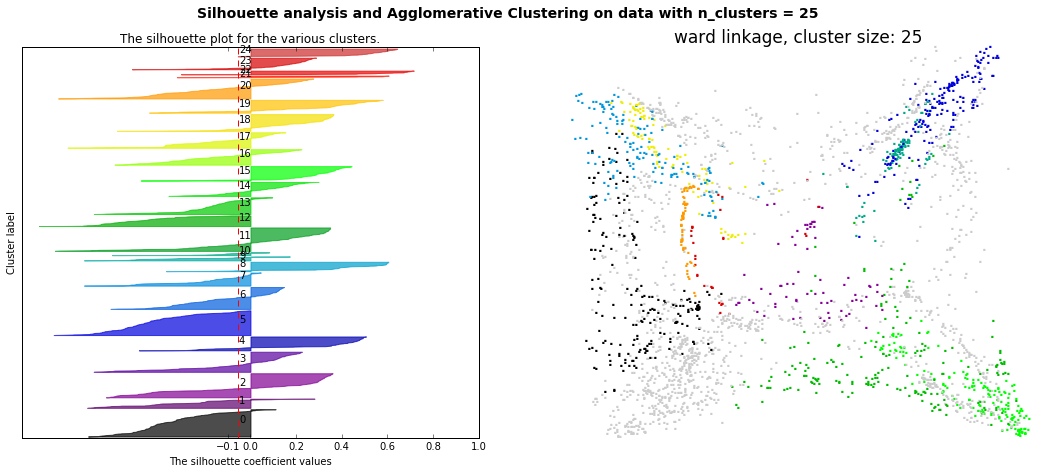

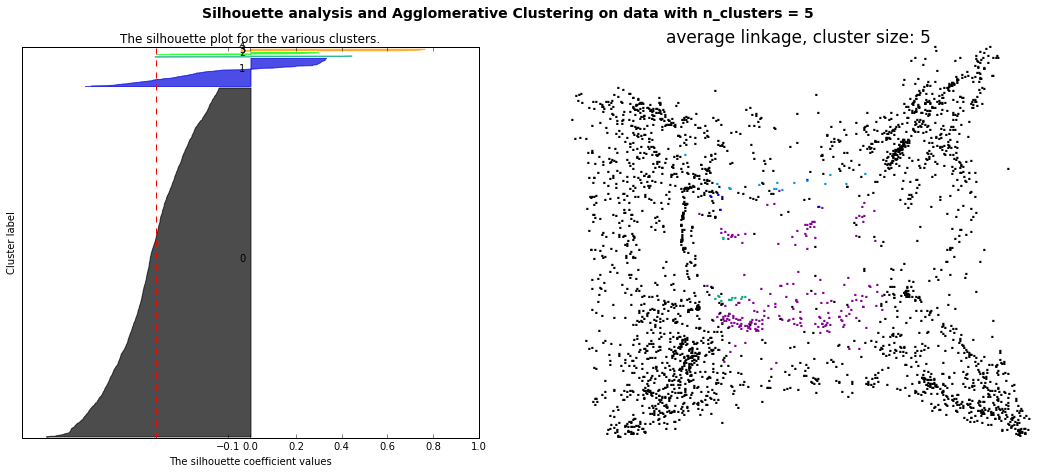

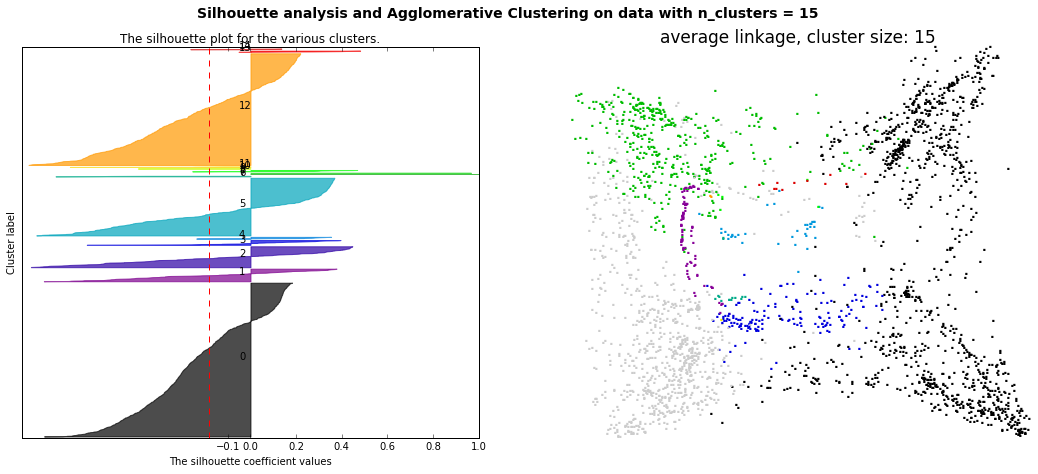

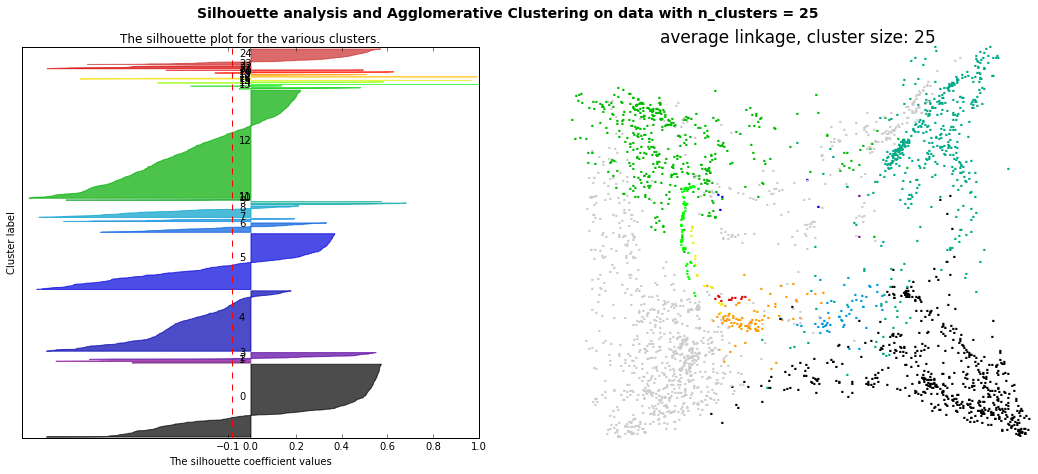

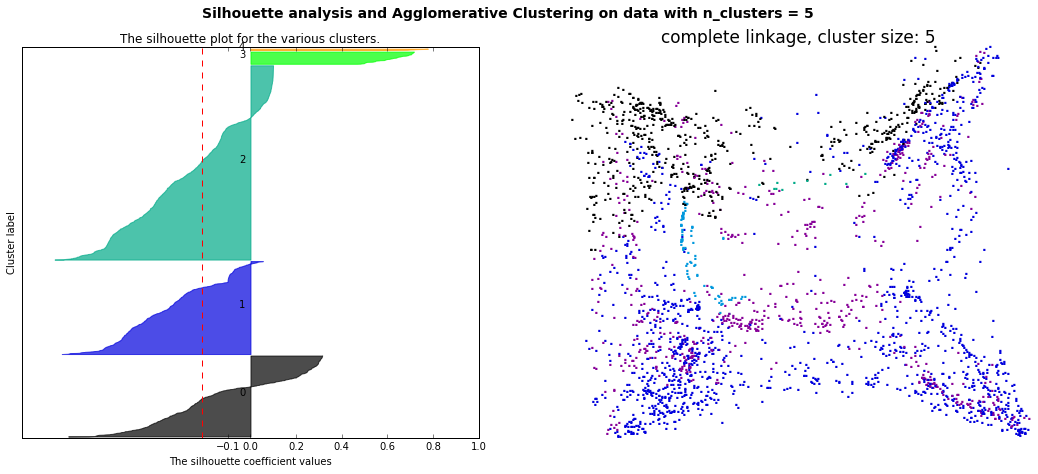

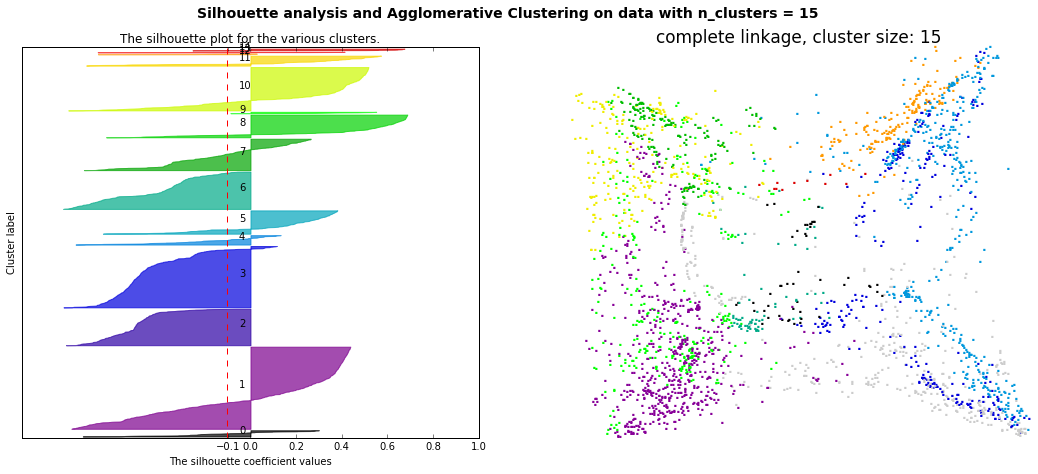

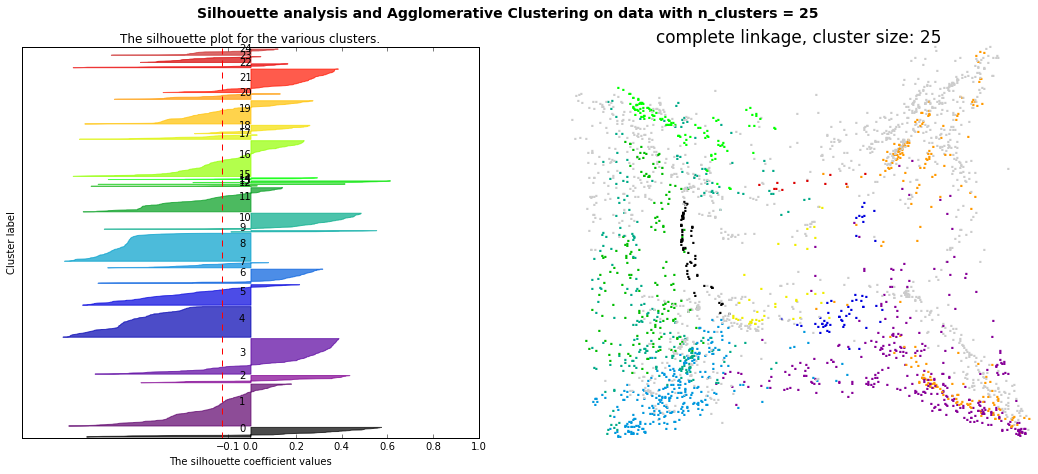

In [89]:
# Agglomerative Clustering
for linkage in ('ward', 'average', 'complete'):
    for cluster_size in cluster_size_list:
        clustering = AgglomerativeClustering(linkage=linkage, n_clusters=cluster_size)
        t0 = time()
        clustering.fit(scaled_features)
        print("%s : %.2fs" % (linkage, time() - t0))

        # Print silhouette score
        silhouette_avg = silhouette_score(scaled_features_red, clustering.labels_)
        print("silhouette: ", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(scaled_features_red, clustering.labels_)
        
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-1, 1])
        ax1.set_ylim([0, len(scaled_features_red) + (cluster_size + 1) * 10])

        
        y_lower = 10
        for i in range(cluster_size):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[clustering.labels_ == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / cluster_size)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        plt.suptitle(("Silhouette analysis and Agglomerative Clustering on data "
                      "with n_clusters = %d" % cluster_size),
                     fontsize=14, fontweight='bold')

        plot_clustering(scaled_features_red, scaled_features, clustering.labels_, ax2, "%s linkage, cluster size: %d" % (linkage, cluster_size))
#         plt.show()        
    
plt.show()

# TODO: PLOT DENDROGRAM

('silhouette: ', 0.48961237080422892)
('silhouette: ', 0.023493470985926832)
('silhouette: ', -0.025659329278195496)


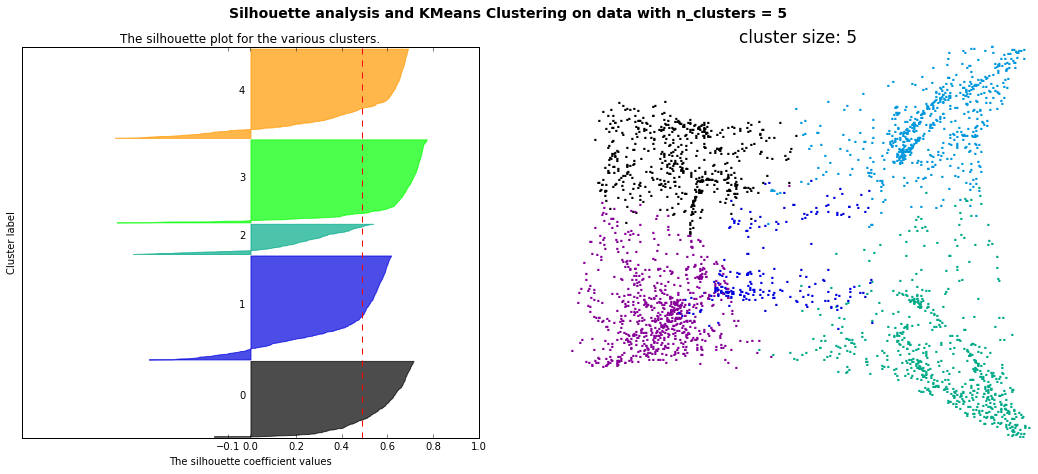

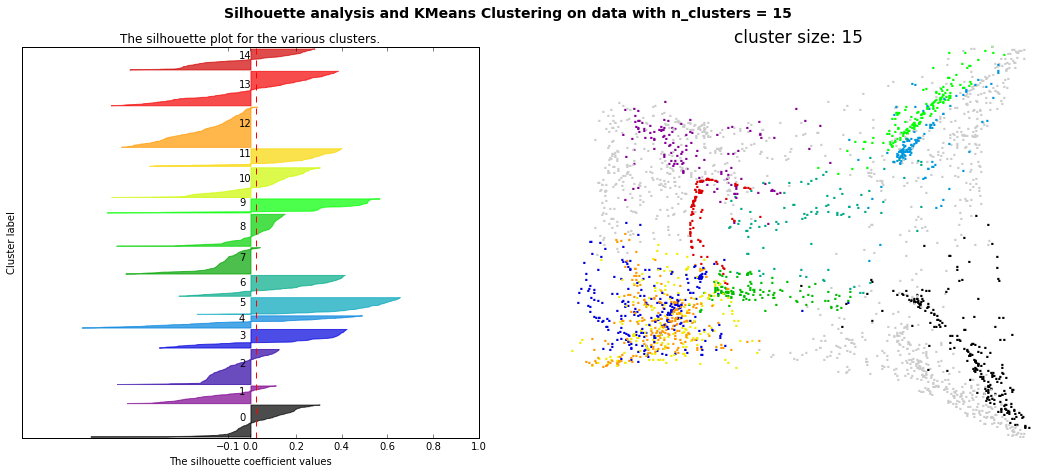

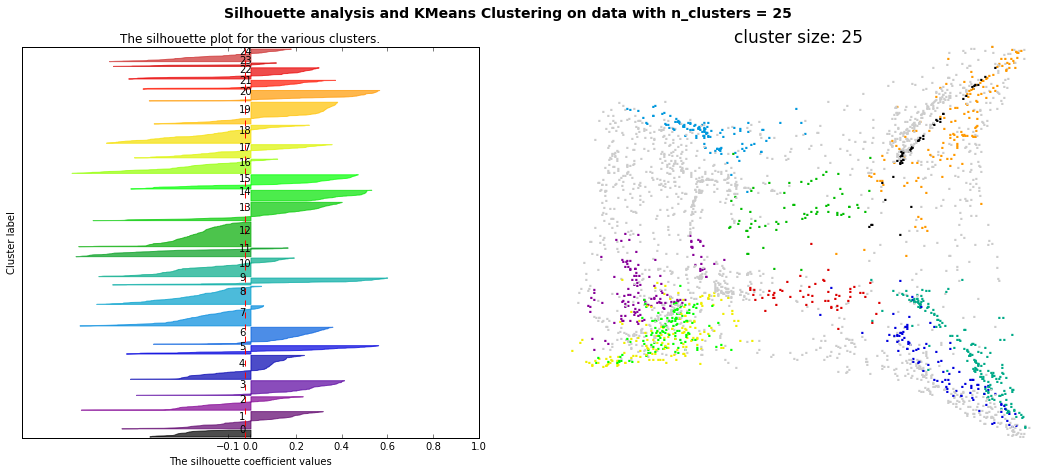

In [94]:
# KMeans Clustering


for cluster_size in cluster_size_list:
    clustering = KMeans(n_clusters=cluster_size, random_state=0)
    clustering.fit(scaled_features)

    # Print silhouette score
    silhouette_avg = silhouette_score(scaled_features_red, clustering.labels_)
    print("silhouette: ", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_features_red, clustering.labels_)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_features_red) + (cluster_size + 1) * 10])


    y_lower = 10
    for i in range(cluster_size):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[clustering.labels_ == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / cluster_size)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis and KMeans Clustering on data "
                  "with n_clusters = %d" % cluster_size),
                 fontsize=14, fontweight='bold')

    plot_clustering(scaled_features_red, scaled_features, clustering.labels_, ax2, "cluster size: %d" % cluster_size)

plt.show()

('silhouette: ', 0.10350819472924667)
('silhouette: ', -0.028469686362244947)
('silhouette: ', -0.13949632474210358)


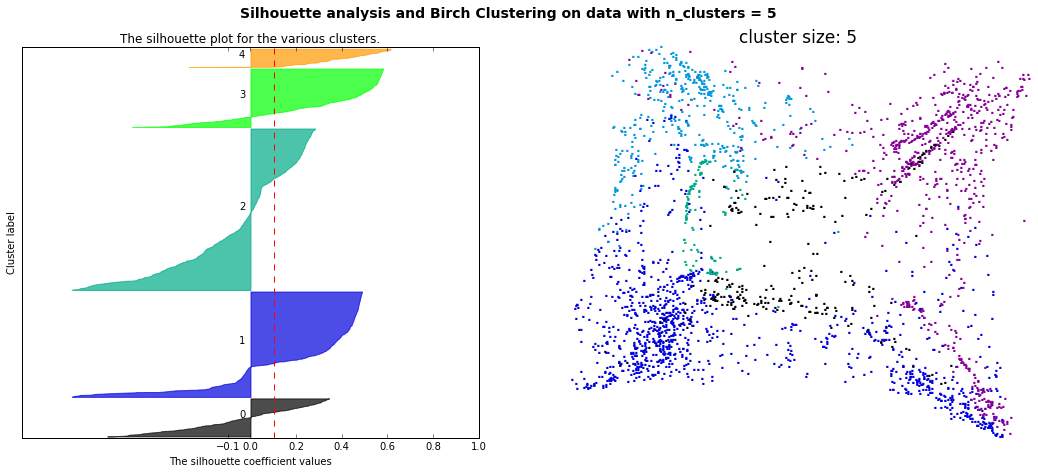

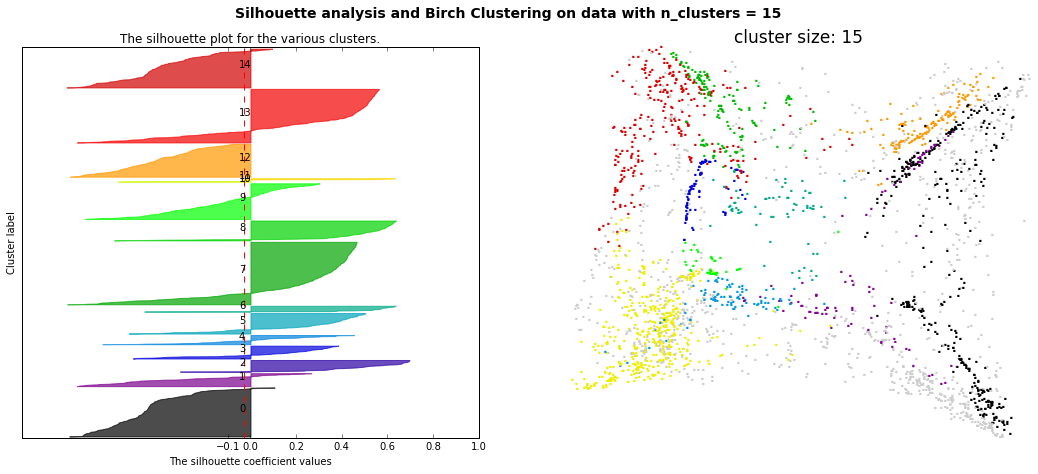

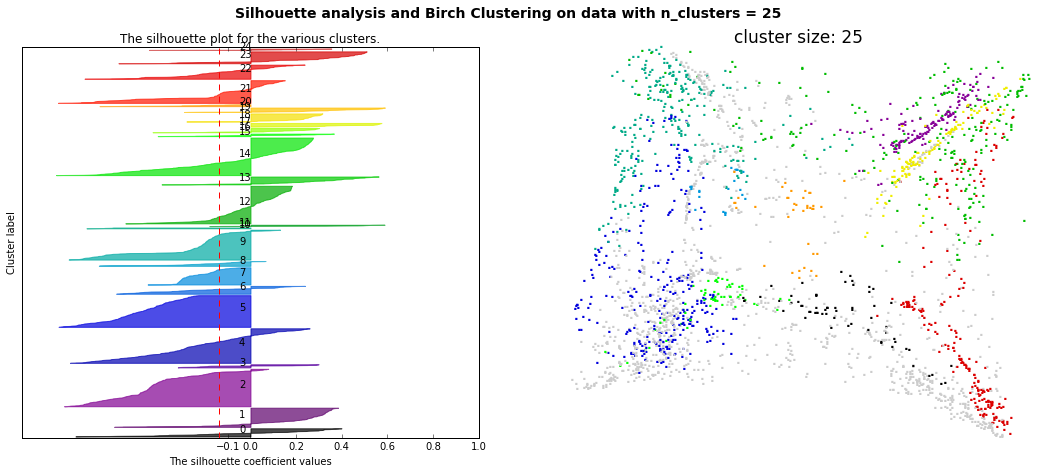

In [111]:
# Birch

for cluster_size in cluster_size_list:
    clustering = Birch(branching_factor=50, n_clusters=cluster_size, threshold=0.5)
    clustering.fit(scaled_features)

    # Print silhouette score
    silhouette_avg = silhouette_score(scaled_features_red, clustering.labels_)
    print("silhouette: ", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_features_red, clustering.labels_)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_features_red) + (cluster_size + 1) * 10])


    y_lower = 10
    for i in range(cluster_size):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[clustering.labels_ == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / cluster_size)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis and Birch Clustering on data "
                  "with n_clusters = %d" % cluster_size),
                 fontsize=14, fontweight='bold')

    plot_clustering(scaled_features_red, scaled_features, clustering.labels_, ax2, "cluster size: %d" % cluster_size)

plt.show()